=== K-Nearest Neighbors Algorithm ===
Accuracy: 0.9556


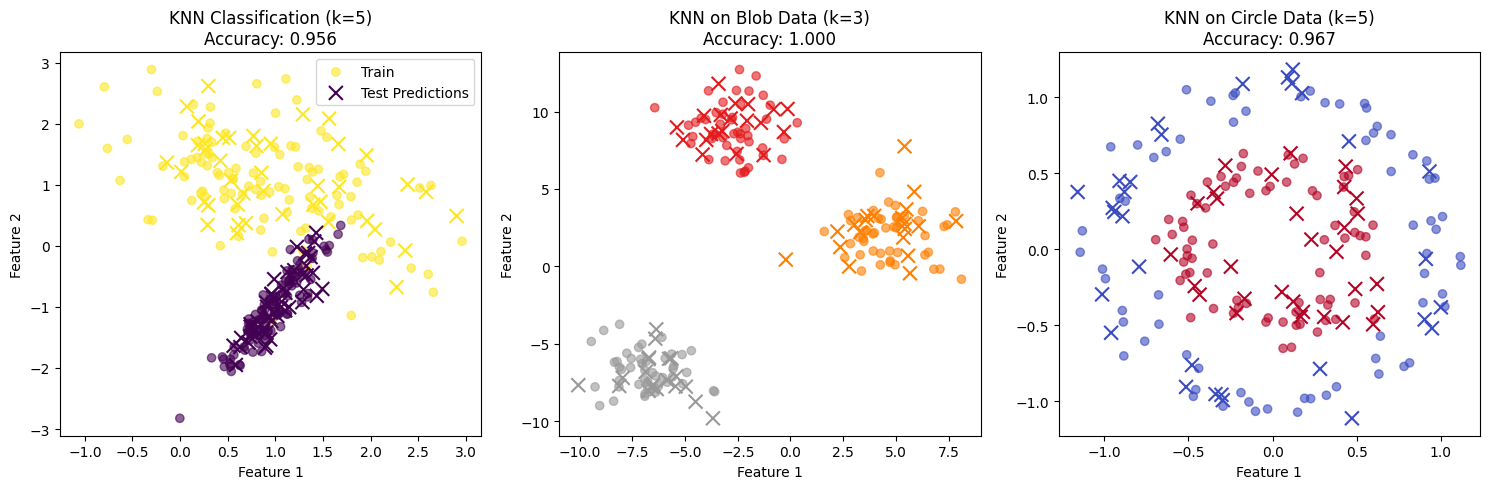


=== Testing Different K Values ===
k=1, Accuracy: 0.9222
k=3, Accuracy: 0.9556
k=5, Accuracy: 0.9556
k=7, Accuracy: 0.9556
k=9, Accuracy: 0.9556


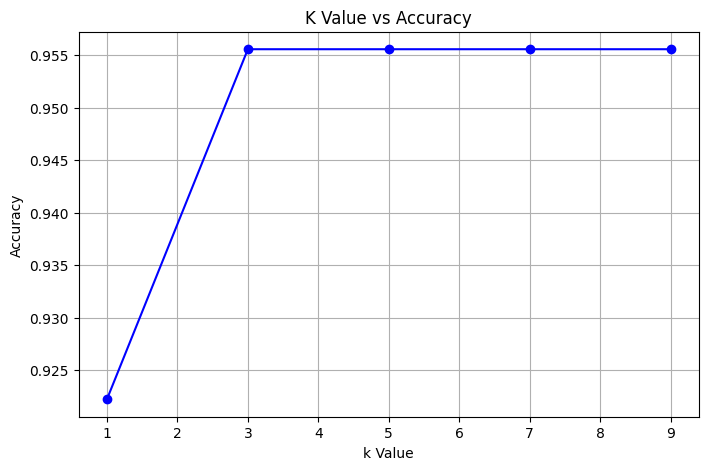

In [1]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

class KNearestNeighbors:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        # Compute distances to all training points
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]

        # Get k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Majority vote
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def predict_proba(self, X):
        """Return probability estimates"""
        proba = []
        for x in X:
            distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]

            # Calculate probabilities
            label_counts = Counter(k_nearest_labels)
            total = sum(label_counts.values())
            proba_dict = {label: count/total for label, count in label_counts.items()}
            proba.append(proba_dict)

        return proba

# Example datasets for KNN
def create_classification_dataset():
    """Create a synthetic classification dataset"""
    X, y = make_classification(n_samples=300, n_features=2, n_redundant=0,
                              n_informative=2, n_clusters_per_class=1,
                              random_state=42)
    return X, y

def create_blob_dataset():
    """Create blob dataset for clustering"""
    X, y = make_blobs(n_samples=200, centers=3, n_features=2,
                      random_state=42, cluster_std=1.5)
    return X, y

def create_circle_dataset():
    """Create concentric circles dataset"""
    from sklearn.datasets import make_circles
    X, y = make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=42)
    return X, y

# Run KNN examples
print("=== K-Nearest Neighbors Algorithm ===")

# Test with classification dataset
X, y = create_classification_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train KNN classifier
knn = KNearestNeighbors(k=5)
knn.fit(X_train, y_train)

# Make predictions
predictions = knn.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

# Plot results
plt.figure(figsize=(15, 5))

# Plot 1: Classification dataset
plt.subplot(1, 3, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', alpha=0.6, label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='viridis', marker='x', s=100, label='Test Predictions')
plt.title(f'KNN Classification (k=5)\nAccuracy: {accuracy:.3f}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Test with blob dataset
X_blob, y_blob = create_blob_dataset()
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_blob, y_blob, test_size=0.3, random_state=42)

knn_blob = KNearestNeighbors(k=3)
knn_blob.fit(X_train_b, y_train_b)
predictions_blob = knn_blob.predict(X_test_b)
accuracy_blob = accuracy_score(y_test_b, predictions_blob)

plt.subplot(1, 3, 2)
plt.scatter(X_train_b[:, 0], X_train_b[:, 1], c=y_train_b, cmap='Set1', alpha=0.6)
plt.scatter(X_test_b[:, 0], X_test_b[:, 1], c=predictions_blob, cmap='Set1', marker='x', s=100)
plt.title(f'KNN on Blob Data (k=3)\nAccuracy: {accuracy_blob:.3f}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Test with circle dataset
X_circle, y_circle = create_circle_dataset()
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_circle, y_circle, test_size=0.3, random_state=42)

knn_circle = KNearestNeighbors(k=5)
knn_circle.fit(X_train_c, y_train_c)
predictions_circle = knn_circle.predict(X_test_c)
accuracy_circle = accuracy_score(y_test_c, predictions_circle)

plt.subplot(1, 3, 3)
plt.scatter(X_train_c[:, 0], X_train_c[:, 1], c=y_train_c, cmap='coolwarm', alpha=0.6)
plt.scatter(X_test_c[:, 0], X_test_c[:, 1], c=predictions_circle, cmap='coolwarm', marker='x', s=100)
plt.title(f'KNN on Circle Data (k=5)\nAccuracy: {accuracy_circle:.3f}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Test different k values
print("\n=== Testing Different K Values ===")
k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn_test = KNearestNeighbors(k=k)
    knn_test.fit(X_train, y_train)
    pred = knn_test.predict(X_test)
    acc = accuracy_score(y_test, pred)
    accuracies.append(acc)
    print(f"k={k}, Accuracy: {acc:.4f}")

# Plot k vs accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, 'bo-')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('K Value vs Accuracy')
plt.grid(True)
plt.show()